In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#to calculate distance
from geopy.distance import great_circle

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
df.shape

(50000, 8)

In [5]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [6]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])

In [7]:
df.head(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
5,50:45.0,12.1,2011-01-06 09:50:45+00:00,-74.000964,40.731630,-73.972892,40.758233,1
6,35:00.0,7.5,2012-11-20 20:35:00+00:00,-73.980002,40.751662,-73.973802,40.764842,1
7,22:00.0,16.5,2012-01-04 17:22:00+00:00,-73.951300,40.774138,-73.990095,40.751048,1
8,10:00.0,9.0,2012-12-03 13:10:00+00:00,-74.006462,40.726713,-73.993078,40.731628,1
9,11:00.0,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2


In [8]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [9]:
df['pickup_year']=df['date_time_of_pickup'].dt.year

df['pickup_weekday']=df['date_time_of_pickup'].dt.weekday

df['pickup_hour']=df['date_time_of_pickup'].dt.hour

df['pickup_month']=df['date_time_of_pickup'].dt.month

In [10]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,pickup_year,pickup_weekday,pickup_hour,pickup_month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,0,17,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,16,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,0,8
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,5,4,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,7,3


In [11]:
df.drop(['date_time_of_pickup','unique_id'],axis=1,inplace=True)

In [12]:
df=df.loc[df['longitude_of_pickup'].between(-75,-72)]
df=df.loc[df['latitude_of_pickup'].between(40,42)]
df=df.loc[df['longitude_of_dropoff'].between(-75,-72)]
df=df.loc[df['latitude_of_dropoff'].between(40,42)]
df=df.loc[df["amount"]>2.5]
df=df.loc[df["no_of_passenger"]>0] 

In [13]:
def cal_distance(longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff):
 
 start_coordinates=(longitude_of_pickup,latitude_of_pickup)
 stop_coordinates=(longitude_of_dropoff,latitude_of_dropoff)
 
 return great_circle(start_coordinates,stop_coordinates).km

In [14]:
df['distance'] = df.apply(lambda x: cal_distance(x['longitude_of_pickup'],x['latitude_of_pickup'],x['longitude_of_dropoff'],x['latitude_of_dropoff'] ), axis=1)


In [15]:
df.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'],axis=1,inplace=True)

In [16]:
df.head()

,amount,no_of_passenger,pickup_year,pickup_weekday,pickup_hour,pickup_month,distance
0,4.5,1,2009,0,17,6,0.410442
1,16.9,1,2010,1,16,1,4.628510
2,5.7,2,2011,3,0,8,1.001023
3,7.7,1,2012,5,4,4,0.910441
4,5.3,1,2010,1,7,3,1.361022


In [17]:
df.isnull().sum()

amount             0
no_of_passenger    0
pickup_year        0
pickup_weekday     0
pickup_hour        0
pickup_month       0
distance           0
dtype: int64

<AxesSubplot:xlabel='distance', ylabel='Count'>

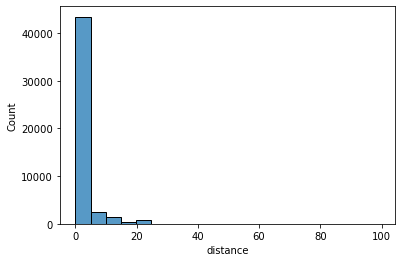

In [18]:
sns.histplot(df['distance'],kde=False,bins=20)

<AxesSubplot:xlabel='distance'>

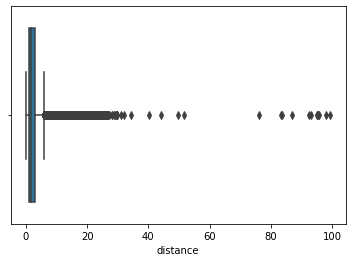

In [19]:
sns.boxplot(x='distance',data=df)

In [20]:
df['distance'].sort_values(ascending=False)

29007    99.389017
5663     98.072140
46009    95.732008
40574    95.376335
3075     95.082148
           ...    
29353     0.000000
7043      0.000000
29426     0.000000
29495     0.000000
49999     0.000000
Name: distance, Length: 48613, dtype: float64

In [21]:
df['distance'].sort_values(ascending=False)

29007    99.389017
5663     98.072140
46009    95.732008
40574    95.376335
3075     95.082148
           ...    
29353     0.000000
7043      0.000000
29426     0.000000
29495     0.000000
49999     0.000000
Name: distance, Length: 48613, dtype: float64

In [22]:
df.no_of_passenger.value_counts()

1    33890
2     7241
5     3374
3     2142
4      991
6      975
Name: no_of_passenger, dtype: int64

<AxesSubplot:xlabel='no_of_passenger', ylabel='count'>

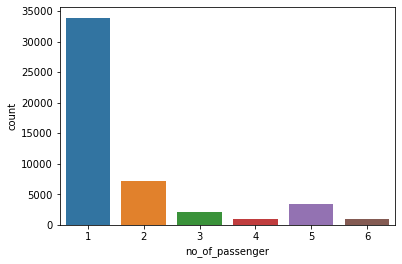

In [23]:
sns.countplot(x='no_of_passenger',data=df)

In [24]:
df=df[df['no_of_passenger']!=0]

In [25]:
df.no_of_passenger.value_counts()

1    33890
2     7241
5     3374
3     2142
4      991
6      975
Name: no_of_passenger, dtype: int64

### frequent trips

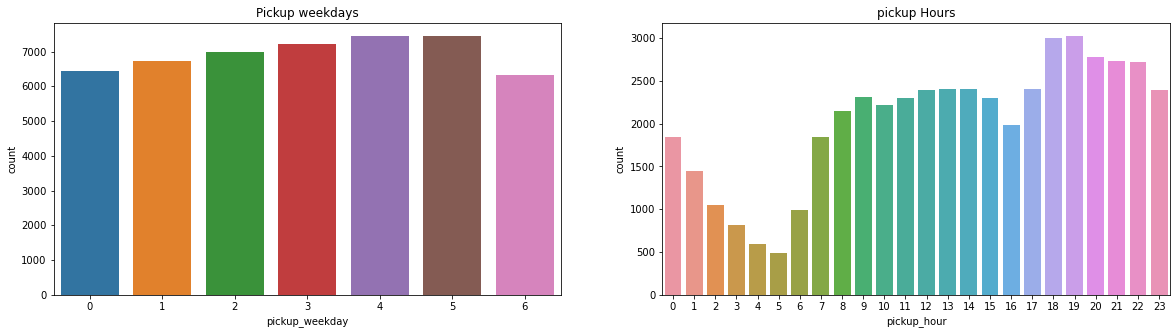

In [26]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup weekdays')
ax=sns.countplot(x="pickup_weekday",data=df,ax=ax1)
ax2.set_title('pickup Hours')
ax=sns.countplot(x="pickup_hour",data=df,ax=ax2)

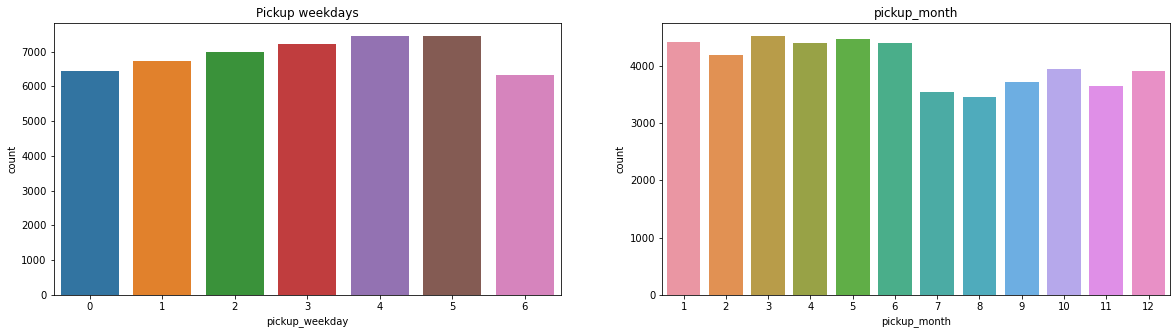

In [27]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup weekdays')
ax=sns.countplot(x="pickup_weekday",data=df,ax=ax1)
ax2.set_title('pickup_month')
ax=sns.countplot(x="pickup_month",data=df,ax=ax2)

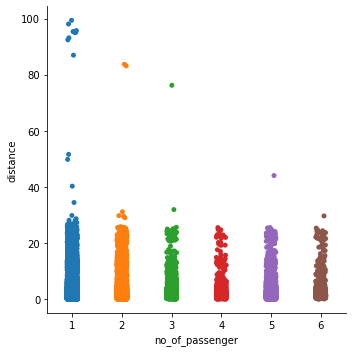

In [28]:
sns.catplot(y='distance',x='no_of_passenger',data=df,kind='strip')

<AxesSubplot:xlabel='no_of_passenger', ylabel='distance'>

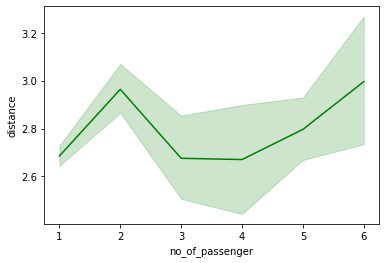

In [29]:
sns.lineplot(y='distance',x='no_of_passenger',data=df,color='green')

<AxesSubplot:xlabel='pickup_weekday', ylabel='distance'>

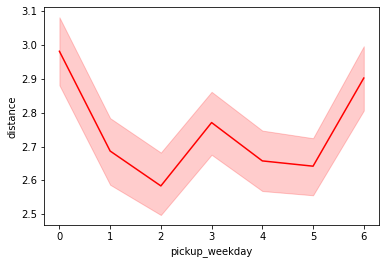

In [30]:
sns.lineplot(y='distance',x='pickup_weekday',data=df,color='red')

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

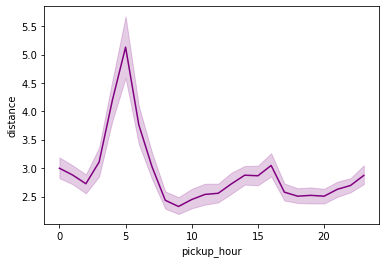

In [31]:
sns.lineplot(y='distance',x='pickup_hour',data=df,color='purple')

In [32]:
x=df.drop(['amount'],axis=1)
y=df[['amount']]

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=3)

In [34]:
reg=LinearRegression()

In [35]:
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
reg.score(x_train,y_train)

0.6014649222822153

In [37]:
reg.score(x_test,y_test)

0.622597133740034

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore

In [39]:
xscaled=x.apply(zscore)
xscaled.describe()

,no_of_passenger,pickup_year,pickup_weekday,pickup_hour,pickup_month,distance
count,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04,4.861300e+04
mean,1.819628e-15,2.253825e-14,-3.199716e-16,1.032574e-16,-3.690984e-16,1.786616e-17
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-5.242460e-01,-1.468031e+00,-1.549345e+00,-2.074408e+00,-1.524713e+00,-6.788285e-01
25%,-5.242460e-01,-9.325401e-01,-1.038272e+00,-6.903063e-01,-9.468515e-01,-4.665234e-01
50%,-5.242460e-01,1.384413e-01,-1.612707e-02,7.863925e-02,-8.005882e-02,-2.910170e-01
75%,2.511098e-01,6.739320e-01,1.006018e+00,8.475848e-01,7.867339e-01,3.127199e-02
max,3.352533e+00,1.744913e+00,1.517090e+00,1.462741e+00,1.653527e+00,2.394171e+01


In [40]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=2)

In [41]:
NNH=KNeighborsRegressor(n_neighbors=29)
NNH.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=29)

In [42]:
NNH.score(x_train,y_train)

0.6808722386301352

In [43]:
predicted_labels=NNH.predict(x_test)
NNH.score(x_test,y_test)

0.7082907871479757

In [44]:
d=np.array([46,43,52,44])

In [45]:
np.std(d)

3.491060010942235

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtree=DecisionTreeRegressor()

In [48]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
dtree.score(x_train,y_train)

0.9999997011041502

In [50]:
dtree.score(x_test,y_test)

0.3012609544352579

In [51]:
dtree1=DecisionTreeRegressor(max_depth=8)

In [52]:
dtree1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [53]:
dtree1.score(x_train,y_train)

0.7485603212357346

In [54]:
dtree1.score(x_test,y_test)

0.722054744410942

In [55]:
from sklearn.ensemble import BaggingRegressor

In [56]:
model=BaggingRegressor(n_estimators=290,base_estimator=dtree1)

In [57]:
model.fit(x_train,y_train)

C:\Users\Murali krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                 n_estimators=290)

In [58]:
model.score(x_train,y_train)

0.7671202797932808

In [59]:
model.score(x_test,y_test)

0.7518160488390208

In [60]:
from sklearn.linear_model import Ridge,Lasso

In [61]:
ridge=Ridge(alpha=0.9)
ridge.fit(x_train,y_train)
print("Ridge model:",(ridge.coef_))

Ridge model: [[0.06671954 1.09588343 0.05367081 0.01335322 0.29002856 7.08336106]]


In [62]:
ridge.score(x_train,y_train)

0.5689636231969788

In [63]:
ridge.score(x_test,y_test)

0.6975445204056905